PREDICTION: [ 712.75       2412.01057692  920.93333333 ... 1993.05138889 2198.95277778
 1115.75833333]
ACCURACY: 790.9767315541967


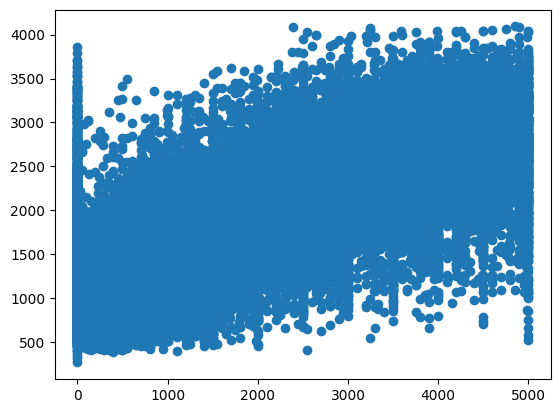

: 

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Grab our dataset
train = pd.read_csv("./autos.csv")
train = train[train['price'] <= 5000]
train = train.sample(frac=0.50)


# Grab our prediction variable
objective_var = ["price"]
objective = train[objective_var]


# Grab our training variables
training_vars = ["yearOfRegistration", "name", "seller", "vehicleType", "model", "kilometer", "fuelType", "brand", "notRepairedDamage"]
training = train[training_vars]


# Split our data into train and test
x_train, x_test, y_train, y_test = model_selection.train_test_split(training, objective)

# # Ordinal encode our values to convert text to numbers
# # Make copies first to stop overwriting everything
x_train = x_train.copy()
x_test = x_test.copy()


# Grab all of our columns with categorical values
s = (x_train.dtypes == 'object')
object_cols = list(s[s].index)


# Apply the ordinal encoding to each categorical variable
ordinal_encoder = OrdinalEncoder()
x_train[object_cols] = ordinal_encoder.fit_transform(x_train[object_cols])
x_test[object_cols] = ordinal_encoder.fit_transform(x_test[object_cols])


# Impute our NAN values
imputer = SimpleImputer()
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)


# Our model
# Define which model to use
model = make_pipeline(PolynomialFeatures(2), RandomForestRegressor())
# model = RandomForestRegressor()
# Train the model using the car data
model.fit(x_train, y_train.values.ravel())

# Predict using the model
prediction = model.predict(x_test)


# Our accuracy
accuracy = mean_absolute_error(prediction, y_test)


print("PREDICTION: {}".format(prediction))
print("ACCURACY: {}".format(accuracy))


# Grab our results
plt.scatter(y_test, prediction)
plt.show()